In [1]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('whitegrid')

# Dimensionality reduction in linear regression

If you are solely interested in building a predictive model and do not care about the interpreting the individual parameters, it can be worthwhile to reduce the computational overhead by combining similar features.  This process is similar to PCA for classifiers, however, the goal here is to reduce the set of input features `X` into a set that contains all the variance in `X` that is shared with `Y`.

The dominant method for this dimensionality reduction is **partial least squares regression (PLSR)**.


We will create a mock dataset to implement and investigate this methodology.

In [2]:
# Number of datapoints in outcome
n = 1000

# Number of features
p = 10

# Create random normally distributed data for the parameters
X = np.random.normal(0, 10, size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters
# but with noise added
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5


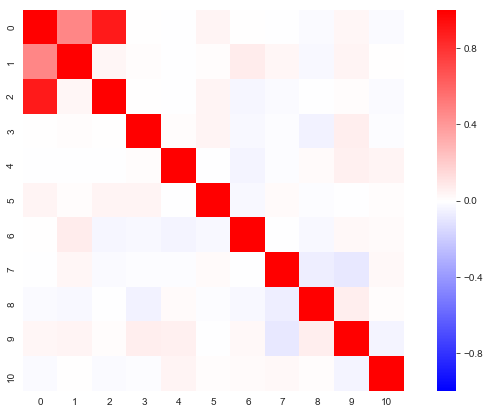

In [3]:
# Visuallizing the correlations. First column is the outcome
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

plt.figure(figsize=(12,7))
sns.heatmap(corrmat, vmax=1, vmin=-1, square=True, cmap='bwr')
plt.show()

In [4]:
# Instatiating a linear regression model
regr = linear_model.LinearRegression()
regr.fit(X, y)
y_pred = regr.predict(X)

print('R^2:', regr.score(X, y))

R^2: 0.9980593930516981


The linear regression model with all of the data does pretty well, however, let's see if we can reduce the computational overhead using PLSR

In [5]:
# Instantiating a partial least squares regression and arbitrarily
# reducing the feature space, R(X), to 3 dimensions
pls1 = PLSRegression(n_components=3)

# The model fit process will automatically reduce X to R(X)
pls1.fit(X, y)
y_pls1_pred = pls1.predict(X)

print('PLSR (n=3) R^2:', pls1.score(X, y))

PLSR (n=3) R^2: 0.998059194125652


The PLSR (n=3) model has almost the exact same R^2 value as the linear regression model with the full feature set.

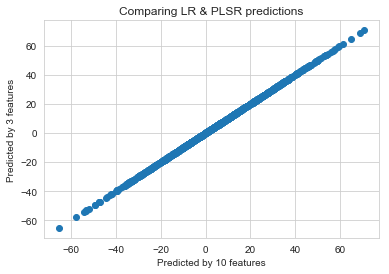

In [6]:
# Comparing the results visually
plt.scatter(y_pred, y_pls1_pred)
plt.title('Comparing LR & PLSR predictions')
plt.xlabel('Predicted by 10 features')
plt.ylabel('Predicted by 3 features')
plt.show()

PLSR only works well in select scenarios.  Namely, when you have high multicollinearity.  It will not work as well if the features are uncorrelated or if feature correlations are paired (f1/f2, f3/f4, etc.)

The number of components to use is usually based on whatever gives the most consistent performance between training & test data.

In [7]:
# Playing with various PLSR models

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.25)

In [13]:
# Re-running the 3 component model using train/test split data
pls2 = PLSRegression(n_components=3).fit(X_train, y_train)
y_pls2_pred = pls2.predict(X_test)

print('PLSR (n=3) R^2:', pls2.score(X_test, y_test))


PLSR (n=3) R^2: 0.9980300530179175


In [14]:
# 2 component model
pls3 = PLSRegression(n_components=2).fit(X_train, y_train)
y_pls3_pred = pls3.predict(X_test)

print('PLSR (n=2) R^2:', pls3.score(X_test, y_test))


PLSR (n=2) R^2: 0.9979448596519809


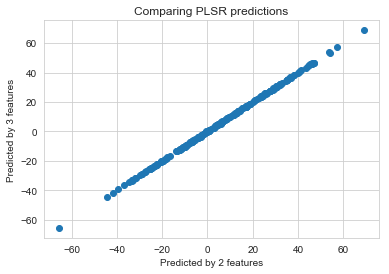

In [15]:
plt.scatter(y_pls2_pred, y_pls3_pred)
plt.title('Comparing PLSR predictions')
plt.xlabel('Predicted by 2 features')
plt.ylabel('Predicted by 3 features')
plt.show()

In [16]:
# 1 component model
pls4 = PLSRegression(n_components=1).fit(X_train, y_train)
y_pls4_pred = pls4.predict(X_test)

print('PLSR (n=1) R^2:', pls4.score(X_test, y_test))


PLSR (n=1) R^2: 0.9834651899929504
